2 errors occurred in iteration number 1.
2 errors occurred in iteration number 2.
3 errors occurred in iteration number 3.
2 errors occurred in iteration number 4.
1 errors occurred in iteration number 5.
0 errors occurred in iteration number 6.
0 errors occurred in iteration number 7.
0 errors occurred in iteration number 8.
0 errors occurred in iteration number 9.
0 errors occurred in the last iteration. Accuracy is 100.00%.


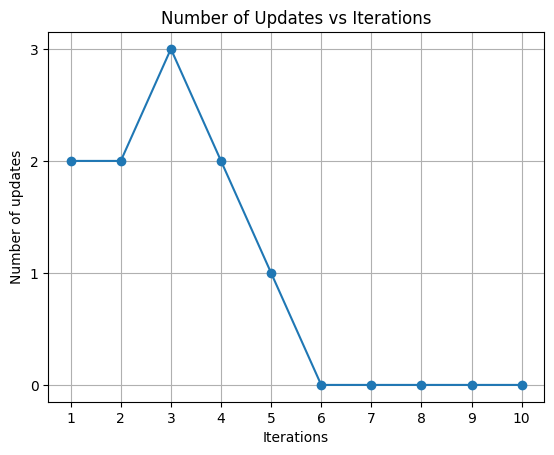

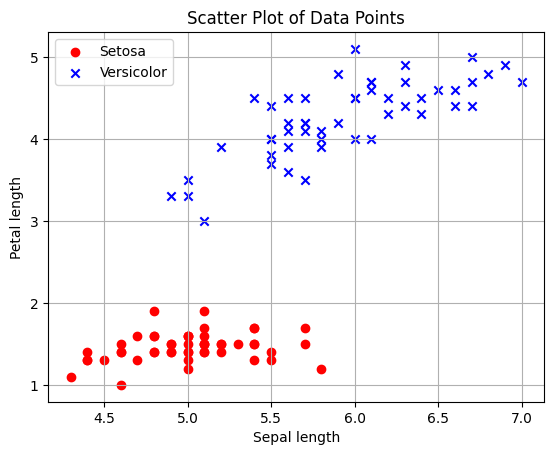

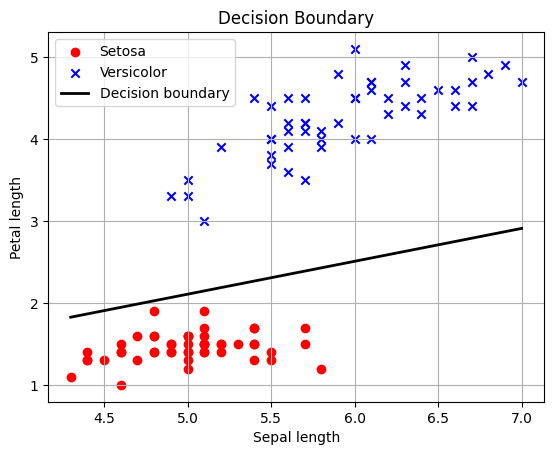

In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, alpha, n_iter):
        self.alpha = alpha            # Alpha is the learning rate.
        self.n_iter = n_iter          # n_iter is the number of iterations.

    def net_input(self, X):           # Perform the matrix product W*X.
        z = np.dot(X, self.w[1:]) + self.w[0]
        return z

    def predict(self, X):             # Apply the activation function that returns 0 or 1.
        phi = np.where(self.net_input(X) >= 0.0, 1, 0)
        return phi

    def train(self, X, y):            # Train the perceptron.
        self.w = np.array([0., 0., 0.])  # Initialize random weights.
        self.errors = []

        for i in range(self.n_iter):   # Update weights in each iteration.
            errors = 0
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))  # Weight update formula.

                self.w[0] += update
                self.w[1:] += update * xi
                errors += int(update != 0.0)

            self.errors.append(errors)
            if i == self.n_iter - 1:   # Display results for the last iteration.
                print(f"{errors} errors occurred in the last iteration. Accuracy is {(len(y) - errors) / len(y) * 100:.2f}%.")
            else:
                print(f"{errors} errors occurred in iteration number {i + 1}.")
        return self

# Load the Iris dataset
iris = load_iris()
X = iris.data[:100, [0, 2]]  # Use sepal length and petal length
Y = iris.target[:100]        # Use only two classes for binary classification

# Initialize and train the perceptron
ppn = Perceptron(alpha=0.1, n_iter=10)
ppn.train(X, Y)

# Plot 1: Number of updates vs. Iterations
plt.figure()
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.title("Number of Updates vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('Number of updates')
plt.xticks(range(1, 11))
plt.yticks(range(0, max(ppn.errors) + 1))
plt.grid()
plt.show()

# Plot 2: Scatter plot of data points
plt.figure()
plt.scatter(X[0:50, 0], X[0:50, 1], c="red", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], c="blue", label="Versicolor", marker="x")
plt.title("Scatter Plot of Data Points")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Plot 3: Decision boundary
plt.figure()
plt.scatter(X[0:50, 0], X[0:50, 1], c="red", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], c="blue", label="Versicolor", marker="x")
plt.plot(
    [4.3, 7],
    [(-ppn.w[0] - 4.3 * ppn.w[1]) / ppn.w[2], (-ppn.w[0] - 7.2 * ppn.w[1]) / ppn.w[2]],
    c="black", label="Decision boundary", linewidth=2
)
plt.title("Decision Boundary")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc="upper left")
plt.grid()
plt.show()
